In [ ]:
%pip install torch
%pip install tensorflow
%pip install torchvision
%pip install PIL

# Basic Setup

In [2]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


Basic Configurations

In [3]:
LEARNING_RATE = 0.001
BATCH_SIZE = 4
EPOCHS = 20
DEVICE = 'cpu'
ROOT_DIR_BLUR = '/Users/gauravrampuria/Desktop/Style Swap/archive (1)/defocused_blurred/'
ROOT_DIR_SHARP = '/Users/gauravrampuria/Desktop/Style Swap/archive (1)/sharp/'

Displaying files in the blurred dataset

In [4]:
sorted(os.listdir(ROOT_DIR_BLUR))

['0_IPHONE-SE_F.JPG',
 '100_NIKON-D3400-35MM_F.JPG',
 '101_NIKON-D3400-35MM_F.JPG',
 '102_NIKON-D3400-35MM_F.JPG',
 '103_HUAWEI-P20_F.jpg',
 '104_IPHONE-SE_F.jpg',
 '105_IPHONE-SE_F.jpg',
 '106_NIKON-D3400-35MM_F.JPG',
 '107_XIAOMI-MI8-SE_F.jpg',
 '108_XIAOMI-MI8-SE_F.jpg',
 '109_HONOR-7X_F.jpg',
 '10_ASUS-ZENFONE-LIVE-ZB501KL_F.jpg',
 '110_IPHONE-7_F.jpeg',
 '111_IPHONE-7_F.jpeg',
 '112_NIKON-D3400-35MM_F.JPG',
 '113_SAMSUNG-GALAXY-A5_F.jpg',
 '114_ASUS-ZE500KL_F.jpg',
 '115_NIKON-D3400-35MM_F.JPG',
 '116_BQ-5512L_F.jpg',
 '117_HONOR-7X_F.jpg',
 '118_HONOR-7X_F.jpg',
 '119_HONOR-7X_F.jpg',
 '11_XIAOMI-MI8-SE_F.jpg',
 '120_HONOR-7X_F.jpg',
 '121_HONOR-7X_F.jpg',
 '122_HONOR-7X_F.jpg',
 '123_NIKON-D3400-35MM_F.JPG',
 '124_HONOR-7X_F.jpg',
 '125_NIKON-D3400-35MM_F.JPG',
 '126_NIKON-D3400-18-55MM_F.JPG',
 '127_IPHONE-8_F.jpeg',
 '128_XIAOMI-MI8-SE_F.jpg',
 '129_NIKON-D3400-18-55MM_F.JPG',
 '12_SAMSUNG-GALAXY-J5_F.jpg',
 '130_NIKON-D3400-18-55MM_F.JPG',
 '131_NIKON-D3400-18-55MM_F.JPG',
 '

Displaying files in the sharp dataset

In [5]:
sorted(os.listdir(ROOT_DIR_SHARP))

['0_IPHONE-SE_S.JPG',
 '100_NIKON-D3400-35MM_S.JPG',
 '101_NIKON-D3400-35MM_S.JPG',
 '102_NIKON-D3400-35MM_S.JPG',
 '103_HUAWEI-P20_S.jpg',
 '104_IPHONE-SE_S.jpg',
 '105_IPHONE-SE_S.jpg',
 '106_NIKON-D3400-35MM_S.JPG',
 '107_XIAOMI-MI8-SE_S.jpg',
 '108_XIAOMI-MI8-SE_S.jpg',
 '109_HONOR-7X_S.jpg',
 '10_ASUS-ZENFONE-LIVE-ZB501KL_S.jpg',
 '110_IPHONE-7_S.jpeg',
 '111_IPHONE-7_S.jpeg',
 '112_NIKON-D3400-35MM_S.JPG',
 '113_SAMSUNG-GALAXY-A5_S.jpg',
 '114_ASUS-ZE500KL_S.jpg',
 '115_NIKON-D3400-35MM_S.JPG',
 '116_BQ-5512L_S.jpg',
 '117_HONOR-7X_S.jpg',
 '118_HONOR-7X_S.jpg',
 '119_HONOR-7X_S.jpg',
 '11_XIAOMI-MI8-SE_S.jpg',
 '120_HONOR-7X_S.jpg',
 '121_HONOR-7X_S.jpg',
 '122_HONOR-7X_S.jpg',
 '123_NIKON-D3400-35MM_S.JPG',
 '124_HONOR-7X_S.jpg',
 '125_NIKON-D3400-35MM_S.JPG',
 '126_NIKON-D3400-18-55MM_S.JPG',
 '127_IPHONE-8_S.jpeg',
 '128_XIAOMI-MI8-SE_S.jpg',
 '129_NIKON-D3400-18-55MM_S.JPG',
 '12_SAMSUNG-GALAXY-J5_S.jpg',
 '130_NIKON-D3400-18-55MM_S.JPG',
 '131_NIKON-D3400-18-55MM_S.JPG',
 '

# Creating the dataset class

In [6]:
class UNETDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.images = sorted(list(self.root_dir + file_name for file_name in os.listdir(self.root_dir)))
        self.transform = transforms.Compose([
            transforms.Resize((512, 512)),
            transforms.ToTensor()])

    def __len__(self):  # Returns the number of images in the dataset
        return len(self.images)

    def __getitem__(self, index):
        # Returns the specific image at that index and label corresponding to that image
        img = Image.open(self.images[index]).convert("RGB") # Reading the image
        img = self.transform(img)   # Transforming the image
        return img

Creating individual datasets

In [7]:
blurred_dataset = UNETDataset(root_dir=ROOT_DIR_BLUR)
sharp_dataset = UNETDataset(root_dir=ROOT_DIR_SHARP)
val = int(0.1 * blurred_dataset.__len__())
test = int(0.2 * blurred_dataset.__len__())
train_dataset, val_dataset, test_dataset = torch.utils.data.random_split(blurred_dataset, [blurred_dataset.__len__() - val - test, val, test])

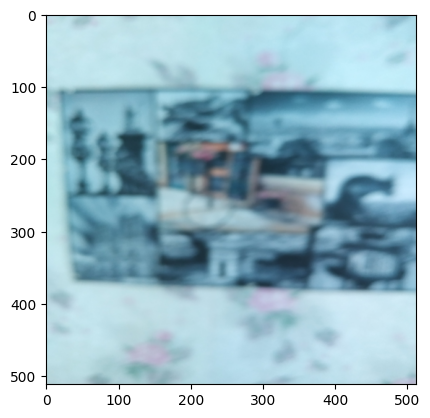

In [8]:
plt.imshow(train_dataset.__getitem__(0).numpy().transpose((1, 2, 0)))

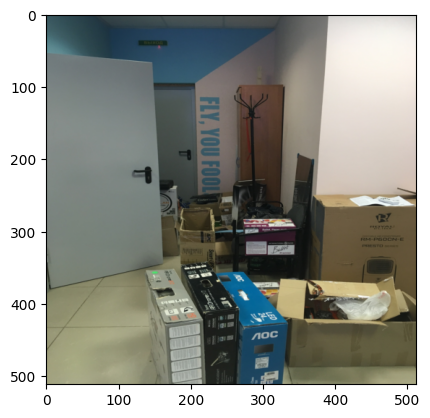

In [9]:
plt.imshow(sharp_dataset.__getitem__(0).numpy().transpose((1, 2, 0)))

In [10]:
print("No. of images in dataset: ", blurred_dataset.__len__())
train_dataset.__len__(), val_dataset.__len__(), test_dataset.__len__()

No. of images in dataset:  350


(245, 35, 70)

Looping through the dataset

In [11]:
for i, image in enumerate(train_dataset):
    print(i, image.size())
    if(i == 10):
        break

0 torch.Size([3, 512, 512])
1 torch.Size([3, 512, 512])
2 torch.Size([3, 512, 512])
3 torch.Size([3, 512, 512])
4 torch.Size([3, 512, 512])
5 torch.Size([3, 512, 512])
6 torch.Size([3, 512, 512])
7 torch.Size([3, 512, 512])
8 torch.Size([3, 512, 512])
9 torch.Size([3, 512, 512])
10 torch.Size([3, 512, 512])


However, we are losing a lot of features by using a simple for loop to iterate over the data. In particular, we are missing out on:

1. Batching the data
2. Shuffling the data
3. Load the data in parallel using multiprocessing workers.

Hence, we create a data loader to implement the above.

# Creating dataloaders

In [12]:
train_dataloader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

val_dataloader = DataLoader(val_dataset, batch_size=BATCH_SIZE,
                        shuffle=True, num_workers=0)
test_dataloader = DataLoader(test_dataset, batch_size=BATCH_SIZE,
                        shuffle=False, num_workers=0)

sharp_dataloader = DataLoader(sharp_dataset, batch_size=BATCH_SIZE, shuffle=True, num_workers=0)

# Showing images in batches

torch.Size([4, 3, 512, 512])


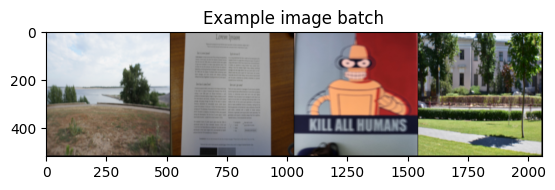

In [13]:
def show_batch(image_batch, title):
    grid = torchvision.utils.make_grid(image_batch)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))
    plt.title(title)
    plt.show()


for i_batch, sample_batched in enumerate(train_dataloader):
    print(sample_batched.size())
    show_batch(sample_batched, "Example image batch")
    if i_batch == 0:
        break

# Double Convolution

In [46]:
class DoubleConv(nn.Module):
    # (Convolution -> Batch Normalization -> ReLU) * 2
    def __init__(self, in_channels, out_channels):
        super(DoubleConv, self).__init__()

        if not mid_channels:
           mid_channels = out_channels
        self.conv_layer = nn.Sequential(
            nn.Conv2d(in_channels, out_channels, kernel_size=3, stride = 1, padding = 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True),
            nn.Conv2d(out_channels, out_channels, kernel_size=3, stride = 1, padding = 1),
            nn.BatchNorm2d(out_channels),
            nn.ReLU(inplace=True)
        )
    
    def forward(self, x):
        return self.conv_layer(x)

# Downlayer (Downsampling)

In [47]:
class DownLayer(nn.Module):
    # Downsampling with Max Pool and then using double convolution
    def __init__(self, in_channels, out_channels):
        super(DownLayer, self).__init__()

        self.downLayer = nn.Sequential(
            nn.AvgPool2d(kernel_size=2, stride=2),
            DoubleConv(in_channels, out_channels)
        )
    
    def forward(self, x):
        return self.downLayer(x)

# Uplayer (Umsampling)

In [48]:
class UpLayer(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(UpLayer, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.up = nn.ConvTranspose2d(in_channels, in_channels // 2, kernel_size=2, stride = 2)
        self.conv = DoubleConv(in_channels, out_channels)

    def forward(self, img, skip_connection):
        img = self.up(img)
        x = torch.cat([skip_connection, img], dim = 1)
        return self.conv(x)

# Out Convolution

In [49]:
class OutConv(nn.Module):
    def __init__(self, in_channels, out_channels):
        super(OutConv, self).__init__()
        self.conv = nn.Conv2d(in_channels, out_channels, kernel_size=1)
    
    def forward(self,x):
        return self.conv(x)

# UNET Architecture

In [50]:
class UNET(nn.Module):
    def __init__(self, n_channels):
        super(UNET, self).__init__()
        self.n_channels = n_channels    # n_channels = 3 ("RGB image")

        self.conv1 = DoubleConv(n_channels, 64)
        self.down1 = DownLayer(64, 128)  # 64 -> 128 channels
        self.down2 = DownLayer(128, 256) # 128 -> 256 channels
        self.down3 = DownLayer(256, 512) # 256 -> 512 channels
        self.down4 = DownLayer(512, 1024) # 512 -> 1024 channels

        self.up1 = UpLayer(1024, 512)   # 1024 -> 512 channels
        self.up2 = UpLayer(512, 256)   # 512 -> 256 channels
        self.up3 = UpLayer(256, 128)   # 256 -> 128 channels
        self.up4 = UpLayer(128, 64)    # 128 -> 64 channels

        self.out = OutConv(64, 3)

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.down1(x1)
        x3 = self.down2(x2)
        x4 = self.down3(x3)
        x5 = self.down4(x4)
        x = self.up1(x5, x4)
        x = self.up2(x, x3)
        x = self.up3(x, x2)
        x = self.up4(x, x1)
        logits = self.out(x)
        return logits

# Creating the model

In [51]:
model = UNET(n_channels=3, bilinear=True)

## Loss function

In [52]:
loss_fn = nn.MSELoss()
optimizer = optim.AdamW(model.parameters(), lr=LEARNING_RATE)

## Training the model

In [53]:
from datetime import datetime
timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
def train_model():
    for i_batch, batch in enumerate(train_dataloader):
        image_batch = batch
        if(i_batch == 1):   # One for one batch only
                break
        maxLoss = 1000
        model_path = ''
        for i in range(EPOCHS):
            model.train(True)
            running_loss = 0
            # Zeros the gradients for every batch    
            optimizer.zero_grad()
            # Get the predictions on this batch
            output = model(image_batch)
            if i == 0:
                show_batch(image_batch, "Desired Output")
            show_batch(output, f"Epoch {i+1}")
            # Calculate the loss
            loss = loss_fn(image_batch, output)
            loss.backward()

            # Adjusting the learning rates
            optimizer.step()

            running_loss += loss.item()
            print(f"Epoch {i+1} : ", running_loss)
            if(running_loss < maxLoss):
                model_path = 'model_{}_{}'.format(timestamp, i)
                maxLoss = running_loss
        torch.save(model.state_dict(), model_path)

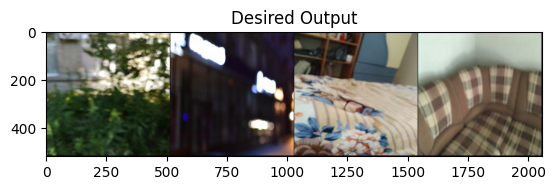

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


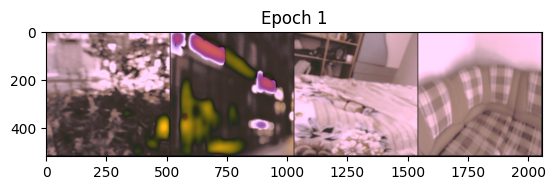

Epoch 1 :  0.029956122860312462


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


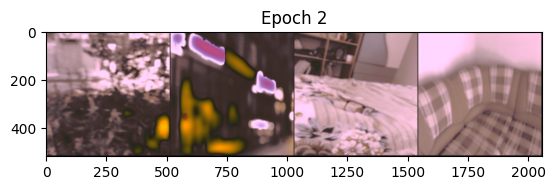

Epoch 2 :  0.023879477754235268


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


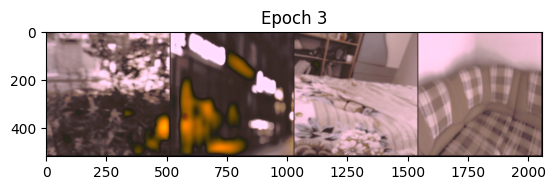

Epoch 3 :  0.01597370207309723


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


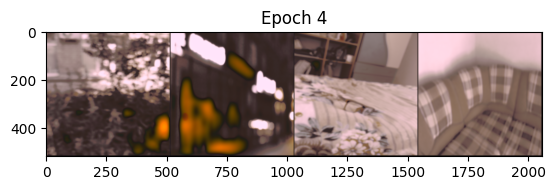

Epoch 4 :  0.01079275831580162


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


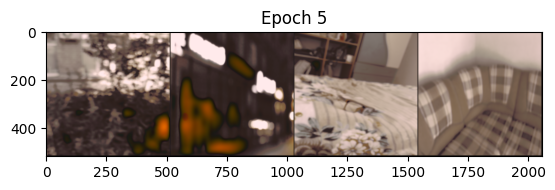

Epoch 5 :  0.006304379086941481


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


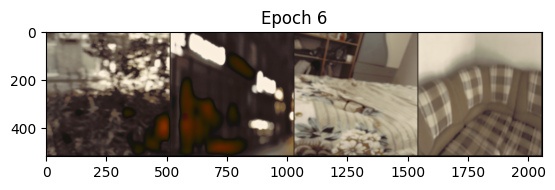

Epoch 6 :  0.003990739583969116


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


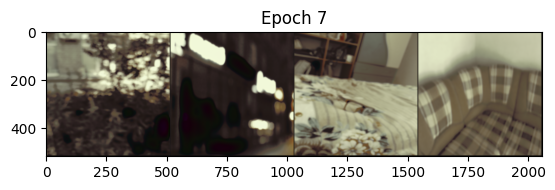

Epoch 7 :  0.0039055459201335907


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


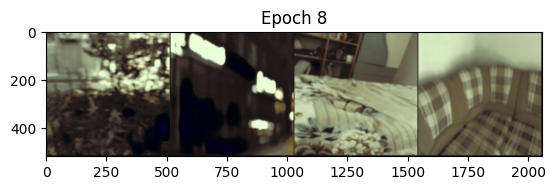

Epoch 8 :  0.005294425413012505


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


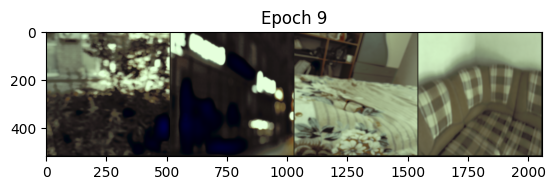

Epoch 9 :  0.006960578262805939


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


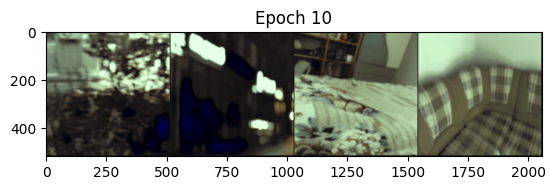

Epoch 10 :  0.007915944792330265


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


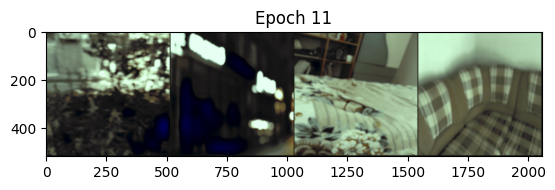

Epoch 11 :  0.007715901359915733


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


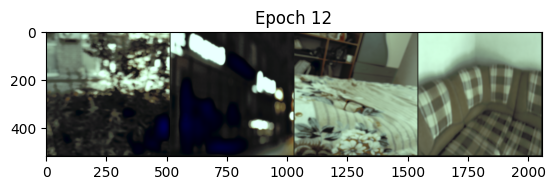

Epoch 12 :  0.006581481080502272


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


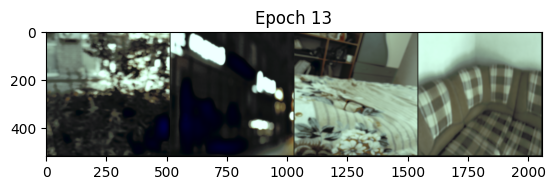

Epoch 13 :  0.005154032725840807


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


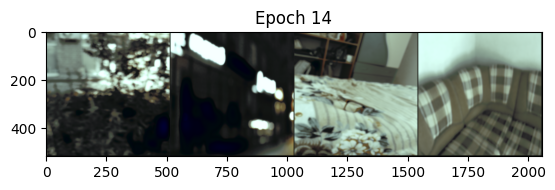

Epoch 14 :  0.004066936206072569


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


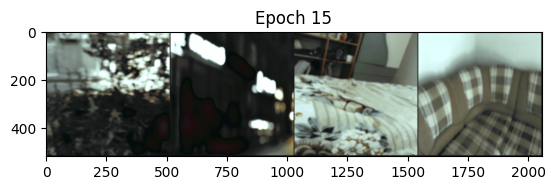

Epoch 15 :  0.0036153867840766907


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


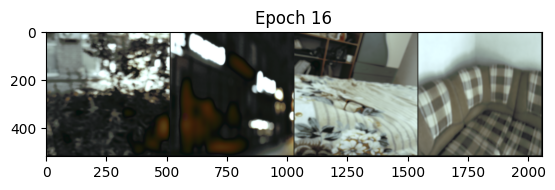

Epoch 16 :  0.0036739713978022337


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


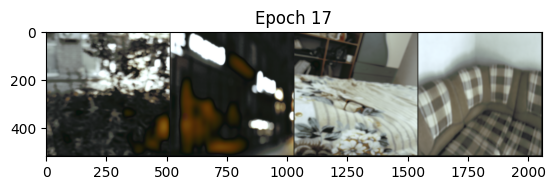

Epoch 17 :  0.0038816265296190977


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


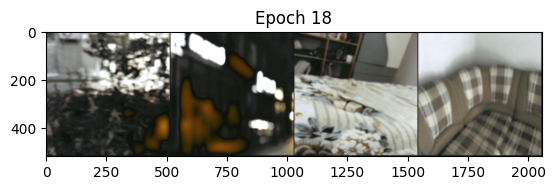

Epoch 18 :  0.0039021067786961794


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


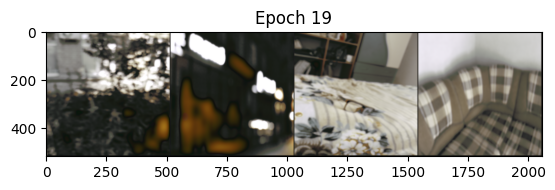

Epoch 19 :  0.003608857514336705


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


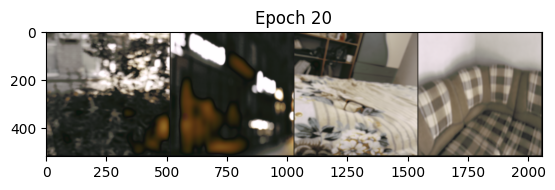

Epoch 20 :  0.003115293802693486


In [55]:
train_model()